# Multiple linear Regression On AirPolution

## Objective

* Identify the Which elements more impact on AirPollution 

* To build the Model which will help to Predict the future AirPollution based on Chemical Element. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

In [2]:
data=pd.read_excel(r"E:\MachineLearning\Linear Regression\AirPollution.xls")
data.head()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2,Site,Date,Season
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37,Mandai,2004-02-07,Summer
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48,Mandai,2004-02-14,Summer
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29,Mandai,2004-02-21,Summer
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42,Mandai,2004-02-28,Summer
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23,Mandai,2004-03-06,Summer


## EDA
Explotary Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   PM10    151 non-null    float64       
 1   Pb      151 non-null    float64       
 2   Cd      151 non-null    float64       
 3   Cu      151 non-null    float64       
 4   Cr      151 non-null    float64       
 5   Zn      151 non-null    int64         
 6   NOx     151 non-null    float64       
 7   SO2     151 non-null    float64       
 8   Site    151 non-null    object        
 9   Date    151 non-null    datetime64[ns]
 10  Season  151 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 13.1+ KB


In [4]:
data.isna().sum()

PM10      0
Pb        0
Cd        0
Cu        0
Cr        0
Zn        0
NOx       0
SO2       0
Site      0
Date      0
Season    0
dtype: int64

The data is not null

In [5]:
data1=data.drop(columns=['Site','Date','Season'])
data1

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
0,120.71,2.67,0.01,0.53,0.61,0,84.17,40.37
1,140.25,3.49,0.02,0.10,0.91,0,88.81,39.48
2,107.01,1.31,0.01,0.19,0.48,0,81.49,48.29
3,88.81,0.76,0.00,0.33,0.39,0,61.80,27.42
4,75.05,0.60,0.00,0.41,1.54,0,48.71,19.23
...,...,...,...,...,...,...,...,...
146,40.13,0.10,0.00,0.04,0.09,0,18.88,10.09
147,40.38,0.10,0.00,0.03,0.09,0,47.56,24.14
148,31.28,0.11,0.00,0.02,0.05,0,31.53,26.64
149,52.10,0.48,0.00,0.04,0.06,0,42.08,22.95


In [6]:
# Statistical information of the numerical data
data1.describe()

,PM10,Pb,Cd,Cu,Cr,Zn,NOx,SO2
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.0,151.000000,151.000000
mean,68.536026,0.716358,0.000265,0.331854,0.390066,0.0,42.692914,22.359868
std,40.908548,0.673069,0.001982,0.408259,0.434575,0.0,23.101723,10.393498
min,16.240000,0.000000,0.000000,0.000000,0.000000,0.0,8.260000,0.000000
25%,37.005000,0.220000,0.000000,0.040000,0.085000,0.0,25.735000,15.165000
50%,59.610000,0.570000,0.000000,0.130000,0.230000,0.0,37.000000,20.930000
75%,89.820000,0.965000,0.000000,0.535000,0.580000,0.0,54.695000,27.420000
max,194.740000,3.490000,0.020000,1.650000,3.220000,0.0,121.460000,53.270000


<AxesSubplot:>

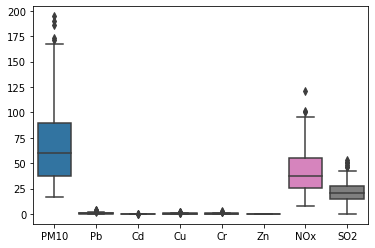

In [7]:
#check outliers by using boxplot
sns.boxplot(data=data1)

In [8]:
#columns name
column=data1.columns
column

Index(['PM10', 'Pb', 'Cd', 'Cu', 'Cr', 'Zn', 'NOx', 'SO2'], dtype='object')

In [9]:
# By Winsorizing technique to treatment on outliers
for i in column:
    Q3= data1[i].quantile(0.75)
    Q1= data1[i].quantile(0.25)
    iqr= Q3-Q1
    UL= Q3+1.5*iqr
    LL= Q1-1.5*iqr
    data1[i]=np.where(data1[i] > UL,UL,data1[i])

<AxesSubplot:>

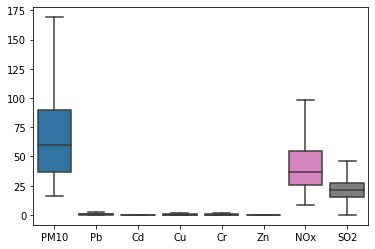

In [10]:
sns.boxplot(data=data1)

In [11]:
# Identify the dependent and independent variable
y=data1[["PM10"]]# dependent variable
x=data1[['Pb','Cu','Cr','NOx','SO2']]# in dependent variable

In [12]:
#Split the data in training and testing set
X_train, X_test, y_train, y_test =train_test_split(x, y, train_size=0.7 ,random_state=120)

In [13]:
df = pd.concat([y_train, X_train], axis=1) # training data
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2
125,26.19,0.00,0.16,0.04,22.14,10.93
48,40.92,0.39,0.08,0.21,26.00,13.66
149,52.10,0.48,0.04,0.06,42.08,22.95
55,90.48,0.72,0.00,0.02,39.16,15.72
63,141.11,1.39,0.53,0.71,80.72,34.31


In [14]:
X_train.corr() #correlation matrix 

,Pb,Cu,Cr,NOx,SO2
Pb,1.000000,0.643005,0.771554,0.649313,0.595104
Cu,0.643005,1.000000,0.759803,0.444826,0.433378
Cr,0.771554,0.759803,1.000000,0.475384,0.438371
NOx,0.649313,0.444826,0.475384,1.000000,0.860182
SO2,0.595104,0.433378,0.438371,0.860182,1.000000


<AxesSubplot:>

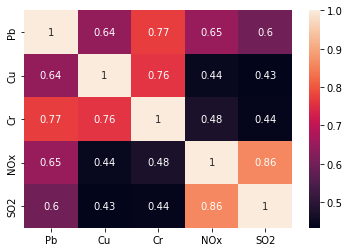

In [15]:
sns.heatmap(data=X_train.corr(),annot=True)

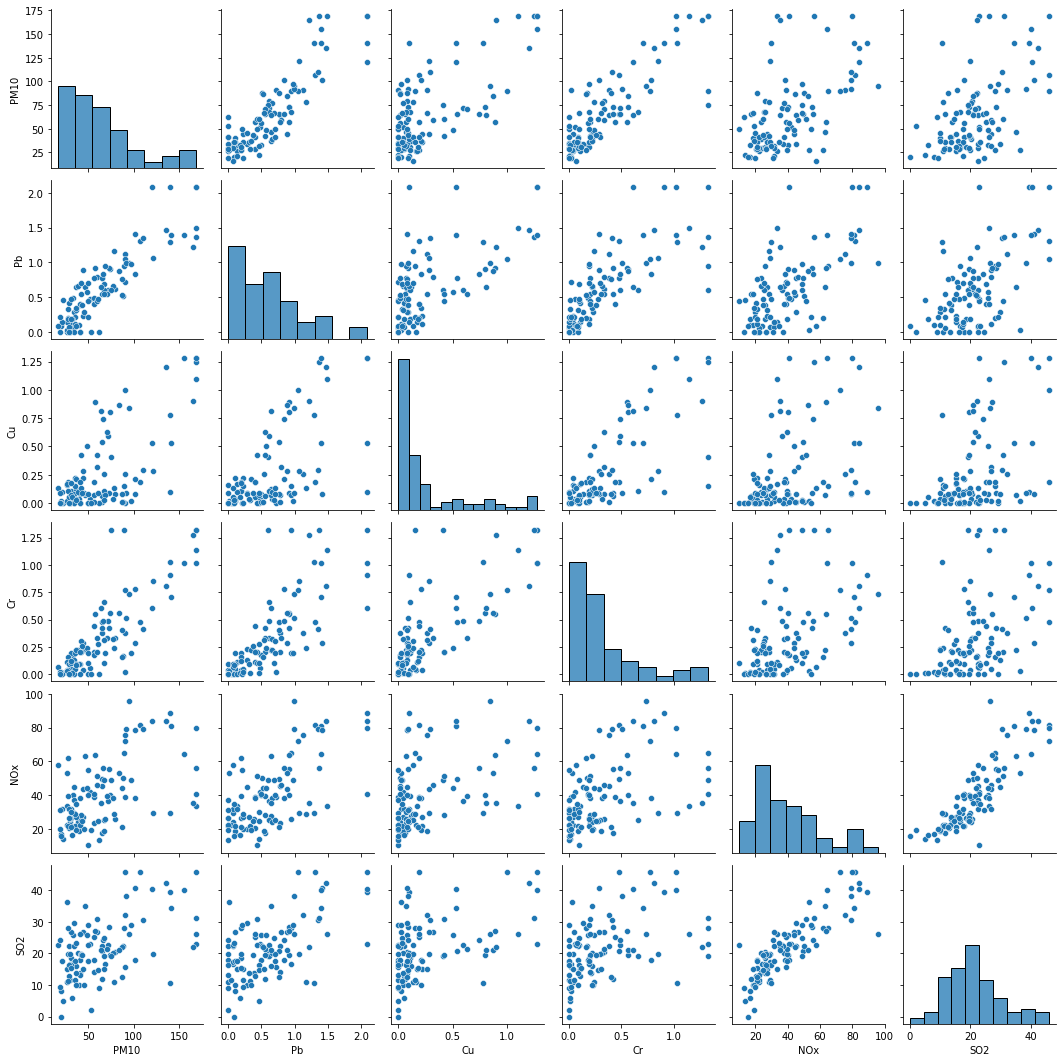

In [16]:
sns.pairplot(df) #Scatter plot and histogram of dependent and independent variable

In [17]:
#VIF=variance inflaction factor
X1 = df.drop(['PM10'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

series_before = pd.Series([variance_inflation_factor(X1.values, i)
                           for i in range(X1.shape[1])], # i=0,1,2
                          index=X1.columns) # column name
series_before


Pb      8.256261
Cu      3.752367
Cr      6.591469
NOx    21.747451
SO2    19.438557
dtype: float64

* The VIF valur of NOx is maximum and its more than 10. 
* Therefore we can say that the multicollearity present in the model.
* Drop NOx variable and check again VIF

In [18]:
X1 = df.drop(['PM10','NOx'],axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor

series_before = pd.Series([variance_inflation_factor(X1.values, i)
                           for i in range(X1.shape[1])], # i=0,1,2
                          index=X1.columns) # column name
series_before


Pb     7.687853
Cu     3.751185
Cr     6.589538
SO2    3.835246
dtype: float64

All values are less than 10. so colinearity is not present in this data

## Model Bulding
*  H0 :- There is no Linear relationship between PM10 and pb , cu ,cr and so2.

* Vs 

*  H1 :- There is Linear relationship between PM10 and pb , cu ,cr and so2.

Alpha = 0.05 (5%)

In [19]:
import statsmodels.formula.api as smf
model=smf.ols('PM10 ~ Pb + Cu + Cr + SO2',data=df).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     133.6
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           3.25e-39
Time:                        18:50:38   Log-Likelihood:                -435.83
No. Observations:                 105   AIC:                             881.7
Df Residuals:                     100   BIC:                             894.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.6108      3.865      5.850      0.000      14.942      30.279
Pb            43.6485      5.405      8.076      0.000      32.926      54.371
Cu             6.6132      7.008      0.944      0.348      -7.291      20.517
Cr            40.1701      8.294      4.843      0.000      23.715      56.625
SO2           -0.0051      0.205     -0.025      0.980      -0.412       0.401
==============================================================================
Omnibus:                        2.997   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.224   Jarque-Bera (JB):                2.765
Skew:                           0.397   Prob(JB):                        0.251
Kurtosis:                       2.974   Cond. No.                         151.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between PM10 , pb and cr.
* There is no Linear relationship between pm10 , cu , so4
 * so we will remove the Cu and So4. and re-run the model 
* 84.2% is accuracy of model , so we say model is good fit 

In [20]:
model2=smf.ols('PM10 ~ Pb + Cr',data=df).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PM10   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     269.7
Date:                Wed, 15 Jun 2022   Prob (F-statistic):           1.87e-41
Time:                        18:50:38   Log-Likelihood:                -436.30
No. Observations:                 105   AIC:                             878.6
Df Residuals:                     102   BIC:                             886.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.4490      2.407      9.328      0.000      17.675      27.223
Pb            44.2223      4.791      9.230      0.000      34.719      53.726
Cr            44.4242      6.901      6.438      0.000      30.737      58.111
==============================================================================
Omnibus:                        2.564   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.278   Jarque-Bera (JB):                2.275
Skew:                           0.360   Prob(JB):                        0.321
Kurtosis:                       3.019   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* There is Linear relationship between PM10 , pb and cr
* 84.1% is accuracy of model , so we say model is good fit 
* PM10 = 22.4490 + 44.2223 * Pb + 44.4242 * Cr

# Assumption

## Linearity


<AxesSubplot:title={'center':'PM10 v/s Cr'}, xlabel='Cr', ylabel='PM10'>

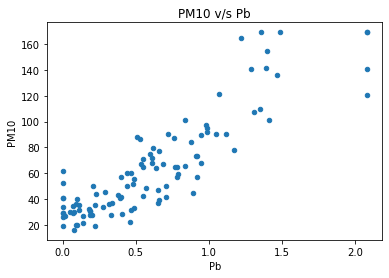

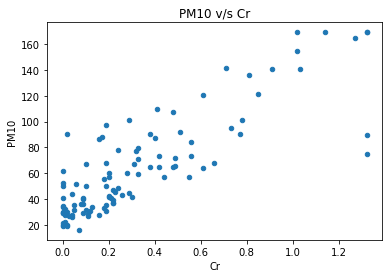

In [21]:
df.plot.scatter(x='Pb',y='PM10',title='PM10 v/s Pb')
df.plot.scatter(x='Cr',y='PM10',title='PM10 v/s Cr')

## Normality

In [22]:
df['fitted_value']=model2.fittedvalues
df['residual']=model2.resid  
df.head()

,PM10,Pb,Cu,Cr,NOx,SO2,fitted_value,residual
125,26.19,0.00,0.16,0.04,22.14,10.93,24.225925,1.964075
48,40.92,0.39,0.08,0.21,26.00,13.66,49.024738,-8.104738
149,52.10,0.48,0.04,0.06,42.08,22.95,46.341115,5.758885
55,90.48,0.72,0.00,0.02,39.16,15.72,55.177501,35.302499
63,141.11,1.39,0.53,0.71,80.72,34.31,115.459146,25.650854


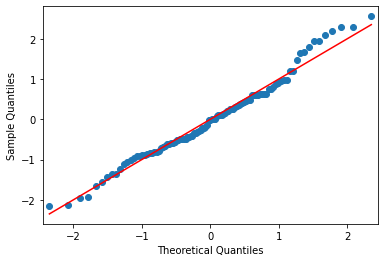

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = sm.qqplot(df['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

we can conclude that the data are follow the normality.

## Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

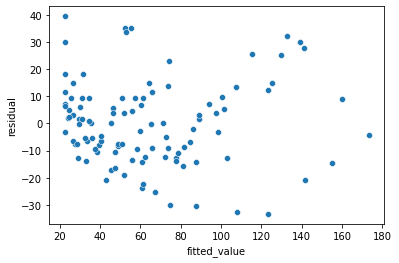

In [24]:
sns.scatterplot(x='fitted_value', y='residual',data=df) # constant variance

This scatter plot show the constant variance are present in the data.

## Model error are IID

C:\Users\YOGESH\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='residual', ylabel='Density'>

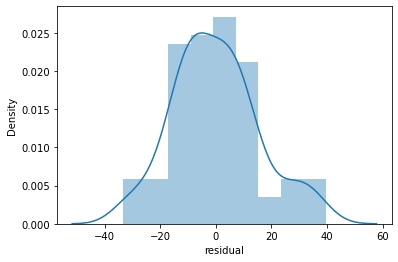

In [25]:
sns.distplot(df['residual'])

Model Error are normal.

## Prediction on test data

In [26]:
df_test=pd.concat([X_test,y_test],axis=1)
df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10
62,1.42,0.11,0.92,95.74,45.8025,153.89
143,0.00,0.00,0.00,30.52,24.5100,37.08
86,1.86,0.97,0.79,78.57,28.7700,99.98
80,0.81,0.83,0.54,39.49,14.8700,81.15
100,0.98,0.97,0.94,33.19,19.1500,101.86


In [27]:
df_test['Prediction']=model2.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,Pb,Cu,Cr,NOx,SO2,PM10,Prediction
62,1.42,0.11,0.92,95.74,45.8025,153.89,126.114898
143,0.00,0.00,0.00,30.52,24.5100,37.08,22.448956
86,1.86,0.97,0.79,78.57,28.7700,99.98,139.797566
80,0.81,0.83,0.54,39.49,14.8700,81.15,82.258094
100,0.98,0.97,0.94,33.19,19.1500,101.86,107.545567


### RMSE for evaluation of Model on train data

In [28]:
import math
from sklearn.metrics import mean_squared_error

# calculate the mean squared error
model_mse = mean_squared_error(df['PM10'],df['fitted_value'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 15.4


## RMSE for evaluation of Model on test data

In [29]:
# calculate the mean squared error
model_mse = mean_squared_error(df_test['PM10'],df_test['Prediction'])

# calulcate the root mean squared error
model_rmse = math.sqrt(model_mse)
# display the output
print("RMSE {:.3}".format(model_rmse))

RMSE 20.4


* Train Data :  RMSE > 10 then model is not good fit 

* Test Data :  RMSE > 10 then model Performance is not good 